In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import pandas as pd
url = 'https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/users.csv'
res = requests.get(url, allow_redirects=True)
with open('users.csv','wb') as file:
    file.write(res.content)
df_users = pd.read_csv('users.csv')

In [4]:
url = 'https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv'
res = requests.get(url, allow_redirects=True)
with open('swipes.csv','wb') as file:
    file.write(res.content)
df_swipes = pd.read_csv('swipes.csv')

In [5]:
df_swipes = df_swipes.rename(columns={'p1': '_id'})

In [6]:
merged_df = pd.merge(df_users, df_swipes, on='_id', how='inner')

In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 0 to 66621
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           66622 non-null  int64  
 1   bio                           65671 non-null  object 
 2   college                       66495 non-null  object 
 3   country                       66622 non-null  object 
 4   createdAt                     66622 non-null  object 
 5   dob                           66495 non-null  object 
 6   email                         66622 non-null  object 
 7   face_detection_probabilities  45624 non-null  object 
 8   gender                        66577 non-null  object 
 9   height                        45513 non-null  float64
 10  insta_username                0 non-null      float64
 11  interests                     66495 non-null  object 
 12  is_habit_drink                57014 non-null  object 
 13  i

In [8]:
mask = merged_df['college'].str.contains('', case=False).fillna(False)
merged_df.loc[mask, 'college'] = 'none'

In [9]:
merged_df['college'] = merged_df['college'].str.lower()

In [10]:
mask = merged_df['college'].str.contains('nehru', case=False).fillna(False)
merged_df.loc[mask, 'college'] = 'jnu'

In [11]:
mask = merged_df['college'].str.contains('jnu', case=False).fillna(False)
merged_df.loc[mask, 'college'] = 'jnu'

In [12]:
mask = merged_df['college'].str.contains('iit', case=False).fillna(False)
merged_df.loc[mask, 'college'] = 'iit delhi'

In [13]:
merged_df['college'].nunique()

1

In [14]:
merged_df['college'] = merged_df['college'].fillna('missing')

In [15]:
merged_df['bio'] = merged_df['bio'].fillna('none')

In [16]:
merged_df['dob'] = merged_df['dob'].fillna('not mentioned')

In [17]:
merged_df['gender'] = merged_df['gender'].fillna('prefer not to say')

In [18]:
merged_df['height'] = merged_df['height'].fillna('prefer not to say')

In [19]:
merged_df['interests'] = merged_df['interests'].fillna('not mentioned')

In [20]:
merged_df['is_habit_drink'] = merged_df['is_habit_drink'].fillna('prefer not to say')
merged_df['is_habit_smoke'] = merged_df['is_habit_smoke'].fillna('prefer not to say')

In [21]:

merged_df = merged_df.drop(['face_detection_probabilities'], axis = 1)
merged_df.columns

Index(['_id', 'bio', 'college', 'country', 'createdAt', 'dob', 'email',
       'gender', 'height', 'insta_username', 'interests', 'is_habit_drink',
       'is_habit_smoke', 'is_verified', 'mobile', 'name', 'status', 'type',
       'updatedAt', 'verified_at', 'what_to_find', 'who_to_date',
       'is_subscribed', 'id', 'first_like_unlike_at', 'first_msg',
       'first_type', 'is_unmatch', 'like_count', 'p1_extend_at', 'p2',
       'p2_extend_at', 'second_like_unlike_at', 'second_msg', 'second_type',
       'unmatch_on'],
      dtype='object')

In [22]:
merged_df['is_verified'] = merged_df['is_verified'].fillna('in process')

In [23]:
merged_df['verified_at'] = merged_df['verified_at'].fillna('not yet verified')

In [24]:
merged_df['what_to_find'] = merged_df['what_to_find'].fillna('not mentioned')

In [25]:
merged_df['who_to_date'] = merged_df['who_to_date'].fillna('prefer not to say')

In [26]:
merged_df['is_subscribed'] = merged_df['is_subscribed'].fillna('missing')
merged_df['first_msg'] = merged_df['first_msg'].fillna('none')

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 0 to 66621
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    66622 non-null  int64  
 1   bio                    66622 non-null  object 
 2   college                66622 non-null  object 
 3   country                66622 non-null  object 
 4   createdAt              66622 non-null  object 
 5   dob                    66622 non-null  object 
 6   email                  66622 non-null  object 
 7   gender                 66622 non-null  object 
 8   height                 66622 non-null  object 
 9   insta_username         0 non-null      float64
 10  interests              66622 non-null  object 
 11  is_habit_drink         66622 non-null  object 
 12  is_habit_smoke         66622 non-null  object 
 13  is_verified            66622 non-null  object 
 14  mobile                 66622 non-null  int64  
 15  na

In [28]:
merged_df = merged_df.drop(['p1_extend_at','p2_extend_at','second_like_unlike_at','second_msg','second_type','unmatch_on'], axis = 1)

In [29]:
merged_df.columns

Index(['_id', 'bio', 'college', 'country', 'createdAt', 'dob', 'email',
       'gender', 'height', 'insta_username', 'interests', 'is_habit_drink',
       'is_habit_smoke', 'is_verified', 'mobile', 'name', 'status', 'type',
       'updatedAt', 'verified_at', 'what_to_find', 'who_to_date',
       'is_subscribed', 'id', 'first_like_unlike_at', 'first_msg',
       'first_type', 'is_unmatch', 'like_count', 'p2'],
      dtype='object')

In [30]:
merged_df['first_type']

0           LIKE
1           LIKE
2           LIKE
3        DISLIKE
4        DISLIKE
          ...   
66617       LIKE
66618    DISLIKE
66619       LIKE
66620       LIKE
66621       LIKE
Name: first_type, Length: 66622, dtype: object

In [31]:
# Calculate the number of likes done by each user
likes_done = merged_df[merged_df['first_type'] == 'LIKE'].groupby('_id').size().reset_index(name='likes_done')

# Calculate the number of likes received by each user
likes_received = merged_df[(merged_df['like_count'] == 1)].groupby('p2').size().reset_index(name='likes_received')

# Merge the two DataFrames to get the final result
result = pd.merge(likes_done, likes_received, left_on='_id', right_on='p2', how='outer').fillna(0)
result['total_likes'] = result['likes_done'] + result['likes_received']

In [32]:
result['_id'] = result['_id'].astype(int)

In [33]:
result.drop(['p2','total_likes'], axis = 1)

,_id,likes_done,likes_received
0,0,145.0,5.0
1,1,52.0,13.0
2,2,48.0,116.0
3,3,98.0,5.0
4,4,1.0,14.0
...,...,...,...
1078,0,0.0,112.0
1079,0,0.0,7.0
1080,0,0.0,18.0
1081,0,0.0,5.0


In [34]:
# Select the rows where '_id' equals 0 except the first row
rows_to_drop = result.loc[(result['_id'] == 0) & (result.index != 0)].index

# Drop the corresponding rows from the DataFrame
result = result.drop(rows_to_drop, axis=0)


In [35]:
df = pd.merge(result, merged_df, on='_id', how='inner')

In [38]:
df.columns

Index(['_id', 'likes_done', 'p2_x', 'likes_received', 'total_likes', 'bio',
       'college', 'country', 'createdAt', 'dob', 'email', 'gender', 'height',
       'insta_username', 'interests', 'is_habit_drink', 'is_habit_smoke',
       'is_verified', 'mobile', 'name', 'status', 'type', 'updatedAt',
       'verified_at', 'what_to_find', 'who_to_date', 'is_subscribed', 'id',
       'first_like_unlike_at', 'first_msg', 'first_type', 'is_unmatch',
       'like_count', 'p2_y'],
      dtype='object')

In [42]:
##creating a scoring function


# define the scoring function
def calculate_score(row):
    score = 0
    
    # check if the profile is verified
    if row['is_verified']:
        score += 10
    
    # add score based on the number of likes and matches received
    score += row['like_count'] * 10
    
    # check if the profile is a paid subscription or free profile
    if row['is_subscribed']:
        score += 10
    
    # check if the user has more likes done than received
    if row['likes_done'] > row['like_count']:
        score += 10
    
    # calculate the dislike by likes ratio
    ratio = row['likes_done'] / row['like_count']
    
    # add score based on the ratio
    if ratio <= 0.5:
        score += 30
    elif ratio <= 1:
        score += 10
    
    return score

# apply the scoring function to the dataset
df['profile_score'] = df.apply(calculate_score, axis=1)

# sort the dataset by profile score in descending order
df = df.sort_values('profile_score', ascending=True)

# print the top 10 profiles based on their profile score
print(df[['name', 'profile_score']].head(10))


         name  profile_score
56084  Atmaja             30
19270    Alok             30
19271    Alok             30
19272    Alok             30
19273    Alok             30
19274    Alok             30
19275    Alok             30
19254    Alok             30
19253    Alok             30
19252    Alok             30


In [46]:
df.drop(['is_verified','like_count','is_subscribed','likes_done'], axis = 1)

,_id,p2_x,likes_received,total_likes,bio,college,country,createdAt,dob,email,...,verified_at,what_to_find,who_to_date,id,first_like_unlike_at,first_msg,first_type,is_unmatch,p2_y,profile_score
56084,1189,1189.0,173.0,198.0,I want to become an IAS,none,IN,2023-02-17T08:59:59.185Z,2003-08-05T00:00:00.000Z,9118900000@get.idyll,...,not yet verified,C,M,43728,2023-02-18T06:38:10.270Z,none,LIKE,False,922,30
19270,392,392.0,1.0,63.0,Hey I'm looking for a good friend 😊,none,IN,2023-02-08T19:37:18.283Z,1997-07-10T00:00:00.000Z,9392000000@get.idyll,...,not yet verified,CON,F,17608,2023-02-11T11:11:07.616Z,none,LIKE,False,418,30
19271,392,392.0,1.0,63.0,Hey I'm looking for a good friend 😊,none,IN,2023-02-08T19:37:18.283Z,1997-07-10T00:00:00.000Z,9392000000@get.idyll,...,not yet verified,CON,F,17609,2023-02-11T11:11:15.509Z,none,DISLIKE,False,726,30
19272,392,392.0,1.0,63.0,Hey I'm looking for a good friend 😊,none,IN,2023-02-08T19:37:18.283Z,1997-07-10T00:00:00.000Z,9392000000@get.idyll,...,not yet verified,CON,F,17610,2023-02-11T11:11:23.170Z,none,LIKE,False,715,30
19273,392,392.0,1.0,63.0,Hey I'm looking for a good friend 😊,none,IN,2023-02-08T19:37:18.283Z,1997-07-10T00:00:00.000Z,9392000000@get.idyll,...,not yet verified,CON,F,19350,2023-02-12T03:27:34.064Z,none,DISLIKE,False,160,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48284,969,969.0,220.0,221.0,🙂,none,IN,2023-02-14T11:03:28.820Z,2004-06-16T00:00:00.000Z,9969000000@get.idyll,...,2023-02-26T21:25:54.163Z,not mentioned,M,29148,2023-02-14T13:34:33.999Z,none,DISLIKE,False,993,70
48285,969,969.0,220.0,221.0,🙂,none,IN,2023-02-14T11:03:28.820Z,2004-06-16T00:00:00.000Z,9969000000@get.idyll,...,2023-02-26T21:25:54.163Z,not mentioned,M,29149,2023-02-14T13:34:37.767Z,none,DISLIKE,False,990,70
48286,969,969.0,220.0,221.0,🙂,none,IN,2023-02-14T11:03:28.820Z,2004-06-16T00:00:00.000Z,9969000000@get.idyll,...,2023-02-26T21:25:54.163Z,not mentioned,M,29150,2023-02-14T13:34:39.687Z,none,DISLIKE,False,916,70
48289,969,969.0,220.0,221.0,🙂,none,IN,2023-02-14T11:03:28.820Z,2004-06-16T00:00:00.000Z,9969000000@get.idyll,...,2023-02-26T21:25:54.163Z,not mentioned,M,29153,2023-02-14T13:34:47.228Z,none,DISLIKE,False,948,70


In [47]:
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading wordnet: <urlopen error EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1129)>
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jasleengill/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenizing Function
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Check if input is a string
    if not isinstance(text, str):  
        return ''
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    
# Applying the function to each user bio
df['bio'] = df.bio.apply(tokenize)

In [64]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [55]:
df['bio']  =df['bio'].astype(object)

Number of unique words:  2380


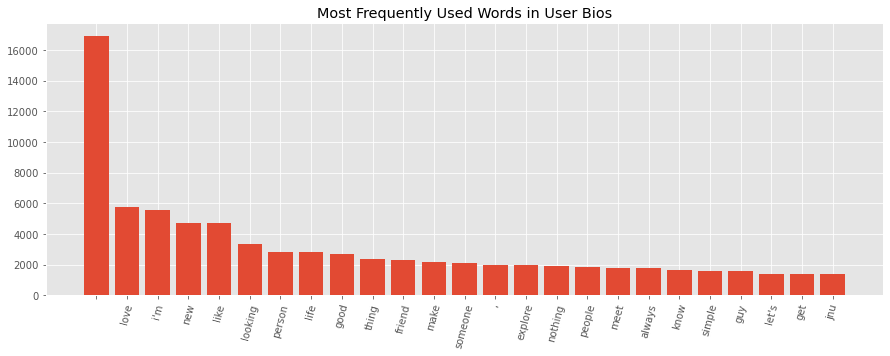

In [65]:
# Creating a set list that will only take in unique words
total_vocab = set()

# Iterating through the bios for each word
for bio in df['bio']:
    total_vocab.update(bio)

# Printing out the number of unique words in all the bios combined
print("Number of unique words: ",len(total_vocab))

# Determining the most frequent words in user bios
words = []

# Adding all the words in each bio to a list
for bio in df['bio']:
    words.extend(bio)

# Determining the use frequency of each word in all the bios
bio_freq = FreqDist(words)
bio_freq.most_common(104)

# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

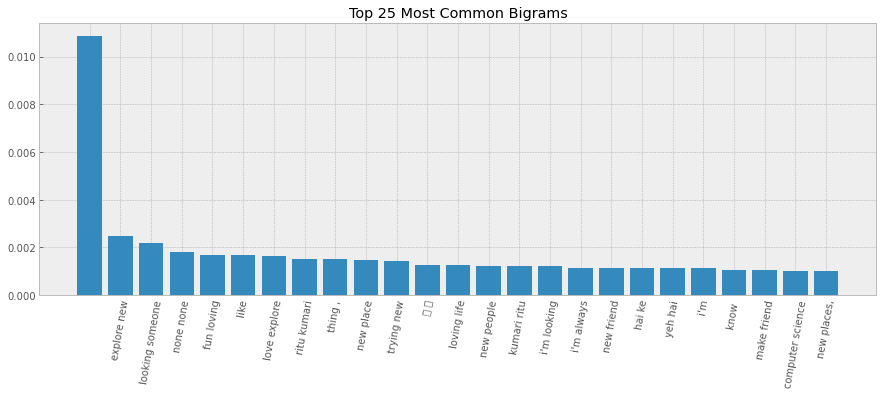

In [66]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

# Top 50 most common bigrams
bio_scored[:50]

# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [70]:
# Applying the function to each user bio
df['interests'] = df.interests.apply(tokenize)

Number of unique words:  939


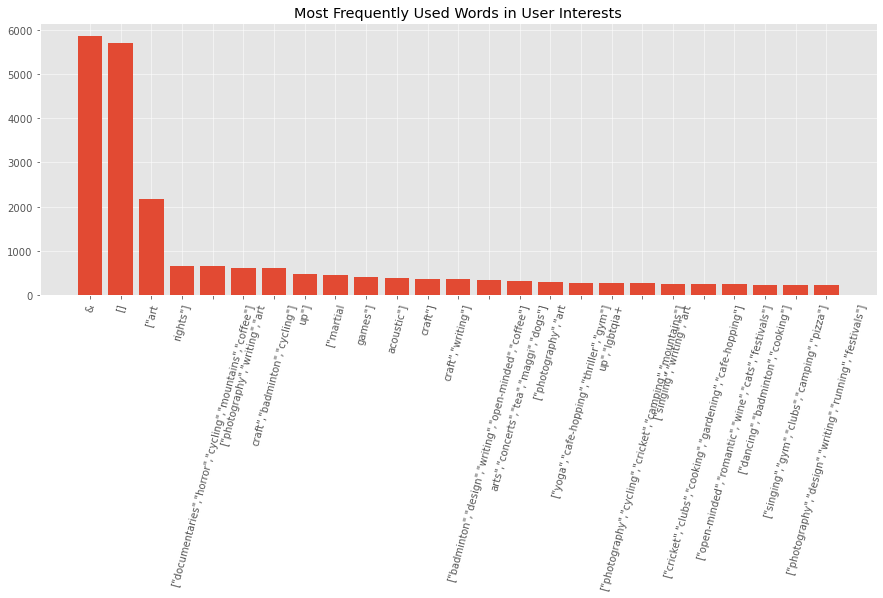

In [71]:
####doing the same thing for interests
# Creating a set list that will only take in unique words
total_vocab = set()

# Iterating through the bios for each word
for interests in df['interests']:
    total_vocab.update(interests)

# Printing out the number of unique words in all the bios combined
print("Number of unique words: ",len(total_vocab))

# Determining the most frequent words in user bios
words = []

# Adding all the words in each bio to a list
for interests in df['interests']:
    words.extend(interests)

# Determining the use frequency of each word in all the bios
inter_freq = FreqDist(words)
inter_freq.most_common(104)

# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*inter_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Interests')
plt.show()

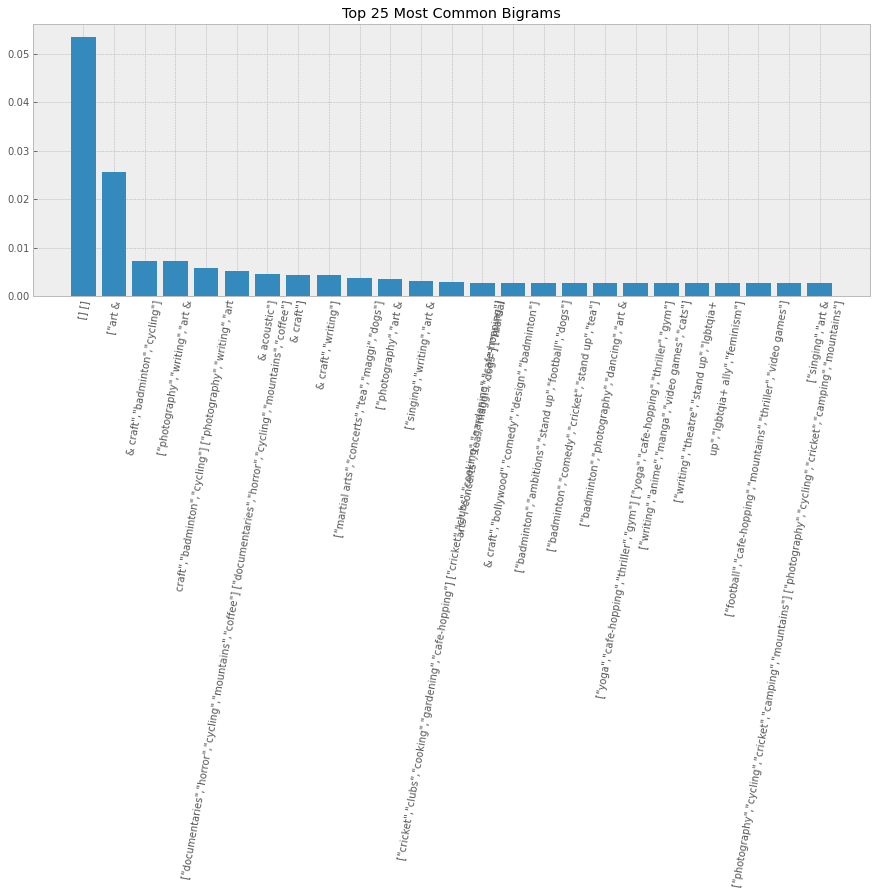

In [72]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
inter_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
inter_scored = inter_finder.score_ngrams(bigram_meas.raw_freq)

# Top 50 most common bigrams
inter_scored[:50]

# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], inter_scored[:50]))

# Creating a list of the frequency scores
inter_scores = list(map(lambda x: x[1], inter_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, inter_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [73]:
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [79]:
from datetime import datetime

def calculate_age(birthdate):
    # Convert birthdate string to datetime object
    if birthdate == 'not mentioned':
        return 'not mentioned'
    else:
        birthdate = datetime.strptime(birthdate, '%Y-%m-%dT%H:%M:%S.%fZ')
        # Calculate age in years using today's date
        today = datetime.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age
df['age'] = df['dob'].apply(calculate_age)


In [83]:
def days_since_creation(created_date):
    """
    Calculates the number of days that have gone by since the account was created.

    Parameters:
    created_date (str): A string representing the date and time of account creation in the format "YYYY-MM-DDTHH:MM:SS.SSSZ"

    Returns:
    int: The number of days since the account was created.
    """
    import datetime
    now = datetime.datetime.utcnow()
    created = datetime.datetime.strptime(created_date[:19], '%Y-%m-%dT%H:%M:%S')
    return (now - created).days
# Apply the function to the 'created_at' column and create a new 'days_since_creation' column
df['days_since_creation'] = df['createdAt'].apply(lambda x: days_since_creation(x) if x != "not mentioned" else None)

In [85]:
df.columns

Index(['_id', 'likes_done', 'p2_x', 'likes_received', 'total_likes', 'bio',
       'college', 'country', 'createdAt', 'dob', 'email', 'gender', 'height',
       'insta_username', 'interests', 'is_habit_drink', 'is_habit_smoke',
       'is_verified', 'mobile', 'name', 'status', 'type', 'updatedAt',
       'verified_at', 'what_to_find', 'who_to_date', 'is_subscribed', 'id',
       'first_like_unlike_at', 'first_msg', 'first_type', 'is_unmatch',
       'like_count', 'p2_y', 'profile_score', 'age', 'days_since_creation'],
      dtype='object')

In [86]:
df_new = df.drop(['likes_done', 'p2_x', 'total_likes',
        'country', 'createdAt', 'dob', 'email',
       'insta_username',  'mobile', 'name', 'updatedAt',
       'verified_at','first_like_unlike_at', 'first_msg', 'first_type', 'p2_y'], axis = 1)

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63886 entries, 56084 to 48258
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  63886 non-null  int64  
 1   likes_received       63886 non-null  float64
 2   bio                  63886 non-null  object 
 3   college              63886 non-null  object 
 4   gender               63886 non-null  object 
 5   height               63886 non-null  object 
 6   interests            63886 non-null  object 
 7   is_habit_drink       63886 non-null  object 
 8   is_habit_smoke       63886 non-null  object 
 9   is_verified          63886 non-null  object 
 10  status               63886 non-null  bool   
 11  type                 63886 non-null  object 
 12  what_to_find         63886 non-null  object 
 13  who_to_date          63886 non-null  object 
 14  is_subscribed        63886 non-null  object 
 15  id                   63886 non-n

In [89]:
df_new.to_csv('df_new.csv', index=False)

# Download the CSV file
from IPython.display import FileLink
FileLink('df_new.csv')

/Users/jasleengill/df_new.csv